# Numpy

In [2]:
import numpy as np

In [3]:
a=np.array([0,1,2,3,4,5])
b=np.array([6,7,8,9,10])
c=np.array([61,71,81,91,110,112])


In [4]:
#dimension of the array
a.ndim

1

In [5]:
#finding the shape
b.shape

(5,)

In [6]:
#we can reshape the array of 6 elements to 3,2/2,3/6,1/1,6
reshape_a = a.reshape((2,3))
reshape_a

array([[0, 1, 2],
       [3, 4, 5]])

In [7]:
#editing a value in the array
reshape_a[1][2]=77
reshape_a

array([[ 0,  1,  2],
       [ 3,  4, 77]])

In [8]:
#make a copy
d = c.reshape((3,2)).copy()
d

array([[ 61,  71],
       [ 81,  91],
       [110, 112]])

In [9]:
d*2 
d**2

array([[ 3721,  5041],
       [ 6561,  8281],
       [12100, 12544]])

In [10]:
d[np.array([0])]

array([[61, 71]])

In [11]:
#can be used to trim values
d[d>=71]=1
d

array([[61,  1],
       [ 1,  1],
       [ 1,  1]])

In [12]:
#clips values from one point to another
a.clip(0,4)

array([0, 1, 2, 3, 4, 4])

In [13]:
#is a nan value
np.isnan(a)
#to remove a nan value and print the output
c[~np.isnan(c)]

array([ 61,  71,  81,  91, 110, 112])

# SciPy

In [14]:
import scipy as sp
import matplotlib.pyplot as plt

In [15]:
data=sp.genfromtxt("data/h_w.tsv",delimiter="\t")

In [16]:
data

array([[   nan,    nan],
       [  1.47,  52.21],
       [  1.5 ,  53.12],
       [  1.52,  54.48],
       [  1.55,  55.84],
       [  1.57,  57.2 ],
       [  1.6 ,  58.57],
       [  1.63,  59.93],
       [  1.65,  61.29],
       [  1.68,  63.11],
       [  1.7 ,  64.47],
       [  1.73,  66.28],
       [  1.75,  68.1 ],
       [  1.78,  69.92],
       [  1.8 ,  72.19],
       [  1.83,  74.46]])

In [17]:
data.shape

(16, 2)

In [18]:
x=data[:,0]
y=data[:,1]

In [19]:
x=x[~sp.isnan(x)]
y=y[~sp.isnan(y)]

In [20]:
x
y

array([ 52.21,  53.12,  54.48,  55.84,  57.2 ,  58.57,  59.93,  61.29,
        63.11,  64.47,  66.28,  68.1 ,  69.92,  72.19,  74.46])

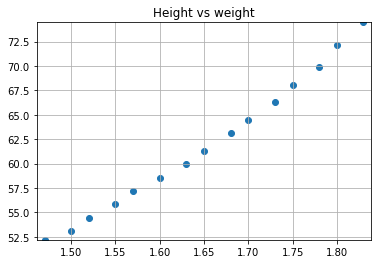

In [21]:
plt.scatter(x,y)
plt.title("Height vs weight")
#plt.xticks([x*7 for x in range(10)],
#['week %i'%y for y in range(10)])
plt.autoscale(tight=True)
plt.grid()
plt.show()

In [22]:
#we use (f(x)-y)**2 to minimize the difference between the o/p values and the function h we use.
def error(f,x,y):
    return sp.sum((f(x)-y)**2)

In [23]:
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)

In [24]:
print("model parems: %s" %fp1)

model parems: [ 61.27218654 -39.06195592]


In [25]:
print(residuals)

[ 7.4905584]


In [26]:
#y=mx+c for a straight line, hence
#f(x) = 61.27218654*x - 39.06195592

f1 = sp.poly1d(fp1)
print(error(f1,x,y))

7.49055840388


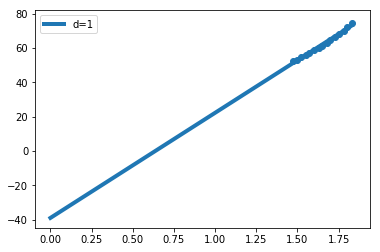

In [27]:
fx = sp.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f1(fx), linewidth=4)
plt.legend(["d=%i" % f1.order], loc="upper left")
plt.scatter(x,y)
plt.show()

# Test


In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [29]:
df = pd.read_csv('data/matches.csv')

In [30]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [31]:
x=df[['team1','team2','toss_winner','toss_decision','venue','umpire1','umpire2']].values

In [32]:
x_few=df[['team1','team2','toss_winner']].values

In [33]:
y=df[['winner']].values

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD


Using TensorFlow backend.


In [35]:
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2)

In [38]:
len(x_train)

508

In [39]:
model.fit(x_few.values,y.values)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

# ML

In [40]:
import matplotlib.pyplot as plt 
import numpy as np
import scipy as sp

#DATA
data=sp.genfromtxt("data/heightweight.tsv",delimiter="\t")
x=data[:,1]
y=data[:,2]
x=x[~sp.isnan(x)]
y=y[~sp.isnan(y)]
print(data.shape)

def Hofx(theta0,theta1):
    for each in x:
        H=theta0 + theta1*x
        return H



(10001, 3)


In [ ]:
z=Hofx(0,1)
print(len(z))
# print(Hofx(0,1))

#plot 
plt.plot(z,x,'ro')
plt.scatter(x,y)
plt.plot([100,150,200,250],[60,65,70,75])
plt.show()